In [104]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

warnings.filterwarnings("ignore", category=FutureWarning)

In [105]:
df_survey = pd.read_csv('survey.csv', skiprows =2)
#survey_df.head()
#print(survey_df.columns)
# clean the data, remove the unecessary columns/rows 
df_survey = df_survey.dropna(axis = 1, how= "all") # drop columns with no values
columns_to_remove = [
    '{"ImportId":"startDate","timeZone":"America/Denver"}',
    '{"ImportId":"endDate","timeZone":"America/Denver"}',
    '{"ImportId":"status"}', '{"ImportId":"ipAddress"}',
    '{"ImportId":"progress"}', '{"ImportId":"duration"}',
    '{"ImportId":"recordedDate","timeZone":"America/Denver"}',
    '{"ImportId":"_recordId"}', '{"ImportId":"locationLatitude"}',
    '{"ImportId":"locationLongitude"}',
    '{"ImportId":"distributionChannel"}', 
    '{"ImportId":"userLanguage"}',
    '{"ImportId":"QID24_TEXT_793ea05a_cl6xuepgwd10Topics"}',
    '{"ImportId":"QID9_14_TEXT_793ea05a_2ihfdjzyz5rtTopics"}',
    '{"ImportId":"Q_UnansweredQuestions"}'
]

#rename columns
df_survey = df_survey.drop(columns=columns_to_remove)
df_survey = df_survey.rename(columns= {'{"ImportId":"finished"}': 'Finished', '{"ImportId":"Q_RecaptchaScore"}': 'Q_RecaptchaScore',
                                       '{"ImportId":"QID3"}': 'Participate', '{"ImportId":"QID4"}' : 'Age',
                                       '{"ImportId":"QID6"}' : 'Country of Residence',
                                       '{"ImportId":"QID7"}' : 'Level of Education',
                                       '{"ImportId":"QID8"}' : 'Living Area', '{"ImportId":"QID9"}' : 'Occupation',
                                       '{"ImportId":"QID9_14_TEXT"}' : 'Occupation : Other',
                                       '{"ImportId":"QID10"}' : 'General Awareness',
                                       '{"ImportId":"QID11"}': 'Seriousness of City Water Quality', 
                                       '{"ImportId":"QID12"}' : 'Awareness of city Management', 
                                       '{"ImportId":"QID13"}' : 'Ppl with no Drinking Water 2023',
                                        '{"ImportId":"QID14"}': 'Causes of Poor Water Quality', 
                                        '{"ImportId":"QID15_1"}' : 'Agriculture',
                                        '{"ImportId":"QID15_2"}': 'Global Warming', '{"ImportId":"QID15_3"}' : 'Industrial Waste',
                                        '{"ImportId":"QID15_4"}': 'Marine Dumping of Garbage', '{"ImportId":"QID15_5"}': 'Oil Leaks and Spills',
                                        '{"ImportId":"QID15_6"}': 'Sewage and Wastewater', '{"ImportId":"QID16"}': 'Attention given to Water on the News',
                                        '{"ImportId":"QID17"}': 'Source of Awareness', '{"ImportId":"QID18"}': 'Know of Urban Aquatic Ecosystem',
                                        '{"ImportId":"QID20_1"}': 'Interest in Water Quality Management', '{"ImportId":"QID21"}': 'Participated in Water Conservation Actitivites',
                                        '{"ImportId":"QID22"}': 'Interest in Learning More', '{"ImportId":"QID23"}': 'Interest in Learning more about City',
                                        '{"ImportId":"QID24_TEXT"}': 'What would you want to learn about', '{"ImportId":"QID25_1"}': 'Likelihood in using digital platform',
                                        '{"ImportId":"QID26"}': 'Features of Platform', '{"ImportId":"QID27"}': 'Interested in Contributing to Platform', '{"ImportId":"QID28"}': 'Interest in joining Community',
                                        '{"ImportId":"QID29"}': 'Motivations to engage with environmental causes',
                                        '{"ImportId":"Q_UnansweredPercentage"}': 'Unanswered Percentage',
                                       })


# remove unwanted rows (age, participation, robots, unanswered questions)
df_survey = df_survey.drop(df_survey[df_survey['Participate'] == 'No'].index)
df_survey = df_survey.drop(df_survey[df_survey['Finished'] == 'False'].index)
df_survey = df_survey.drop(df_survey[df_survey['Age'] == 'Under 16'].index)
df_survey = df_survey.drop(df_survey[df_survey['Q_RecaptchaScore'].fillna(0) <= 0.5].index)
df_survey = df_survey.drop(df_survey[df_survey['Unanswered Percentage'] >= 0.5].index)


# combine occupation columns 
df_survey['Occupation'] = df_survey.apply(lambda row: row['Occupation : Other'] if row['Occupation'] == 'Other, please specify...' else row['Occupation'], axis = 1)
df_survey.drop(columns =['Occupation : Other'], inplace = True)


display(df_survey.head())
df_survey.to_csv("cleaned_survey.csv", index=False)


,Finished,Q_RecaptchaScore,Participate,Age,Country of Residence,Level of Education,Living Area,Occupation,General Awareness,Seriousness of City Water Quality,Awareness of city Management,Ppl with no Drinking Water 2023,Causes of Poor Water Quality,Agriculture,Global Warming,Industrial Waste,Marine Dumping of Garbage,Oil Leaks and Spills,Sewage and Wastewater,Attention given to Water on the News,Source of Awareness,Know of Urban Aquatic Ecosystem,Interest in Water Quality Management,Participated in Water Conservation Actitivites,Interest in Learning More,Interest in Learning more about City,What would you want to learn about,Likelihood in using digital platform,Features of Platform,Interested in Contributing to Platform,Interest in joining Community,Motivations to engage with environmental causes,Unanswered Percentage
1,True,0.9,Yes,18 - 24,Netherlands,Bachelor’s degree,Rural,Student,Somewhat knowledgeable,Somewhat serious,"Yes, I am partially aware (of the state of the...",2.2 billion,It can lead to waterborne disease such as chol...,1.0,3.0,4.0,6.0,2.0,5.0,Somewhat,"Social media,News websites,Word of mouth",Yes,61.0,Yes,Maybe,"Yes, definitely",NaN,6.0,"Educational information,Visualisations of up-t...",Maybe,Maybe,Local impact,0.076923
2,True,0.9,Yes,18 - 24,Italy,Master’s degree or higher,Suburban,Tourism and Hospitality,Neutral,Somewhat serious,"Yes, I am slightly aware.",2.2 billion,It can lead to waterborne disease such as chol...,2.0,3.0,1.0,5.0,6.0,4.0,Somewhat,"Social media,TV/radio",No,5.0,No,Maybe,Maybe,NaN,4.0,"Educational information,Forums for public disc...",Yes,Yes,"Health and Safety,Local impact",0.076923
3,True,1.0,Yes,18 - 24,Netherlands,Bachelor’s degree,Urban,Student,Neutral,Neutral/ Unsure,"Yes, I am partially aware (of the state of the...",1.5 billion,It can lead to waterborne disease such as chol...,2.0,6.0,5.0,4.0,3.0,1.0,Very little,"Social media,News websites,Word of mouth,Educa...",No,6.0,No,Maybe,Maybe,NaN,1.0,"Interactive maps,Educational information,Visua...",No,No,Global Climate Change,0.076923
4,True,1.0,Yes,18 - 24,Netherlands,Bachelor’s degree,Urban,Education,Not very knowledgeable,Somewhat serious,"Yes, I am slightly aware.",2.2 billion,It can lead to waterborne disease such as chol...,2.0,3.0,1.0,6.0,4.0,5.0,Somewhat,"Social media,News websites,Word of mouth,Educa...",No,6.0,No,Yes,"Yes, definitely",What impacts it has on nature and biodiversity...,10.0,Visualizations of up-to-date water quality dat...,Maybe,Maybe,"Concern for future generations,Health and Safe...",0.038462
5,True,0.9,Yes,18 - 24,Netherlands,Bachelor’s degree,Urban,Student,Somewhat knowledgeable,Somewhat serious,"Yes, I am partially aware (of the state of the...",3.6 billion,It can lead to waterborne disease such as chol...,1.0,2.0,4.0,5.0,6.0,3.0,Very little,"Word of mouth,Educational platforms",No,7.0,Yes,Yes,"Yes, definitely",NaN,6.0,"Interactive maps,Visualizations of up-to-date ...",Maybe,Maybe,"Health and Safety,Local impact",0.076923


In [106]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


demographics

In [107]:
survey_df = pd.read_csv('cleaned_survey.csv')

survey_df['Age'].value_counts()


Age
18 - 24     159
45 - 54      54
25 - 34      37
55 - 64      30
35 - 44      16
Under 18      7
65+           7
Name: count, dtype: int64

In [108]:
survey_df['Living Area'].value_counts()

Living Area
Urban       240
Suburban     55
Rural        15
Name: count, dtype: int64

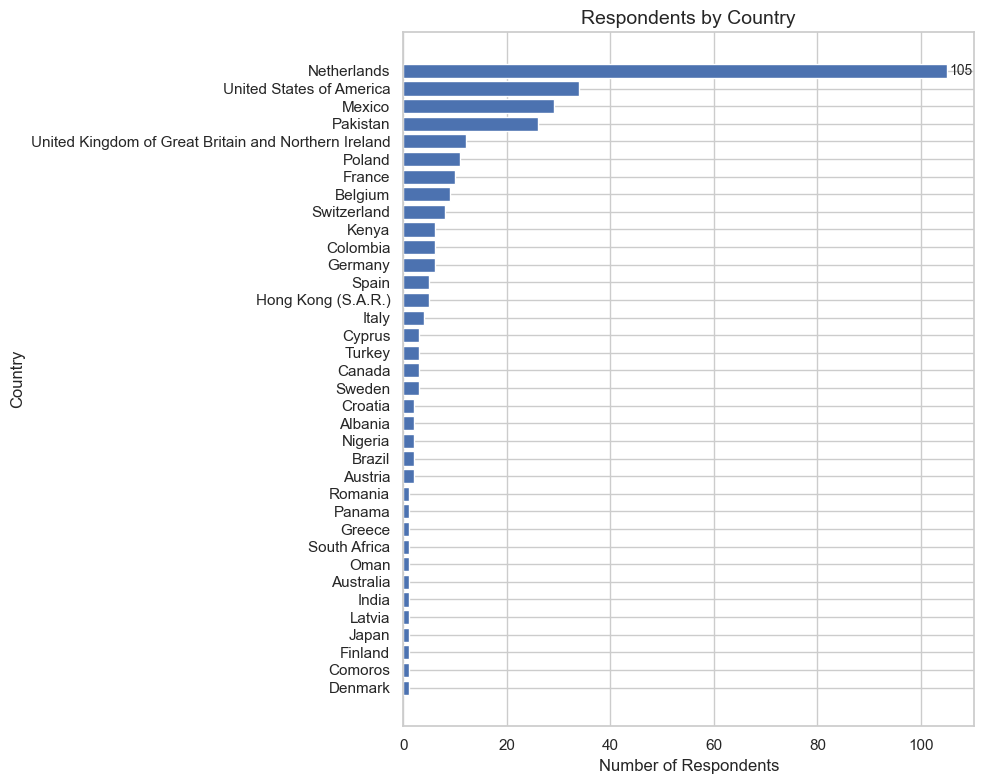

In [ ]:
#distirbution of countries 

country_counts = survey_df['Country of Residence'].value_counts().sort_values(ascending=True)

#plot
plt.figure(figsize=(10, 8))
bars = plt.barh(country_counts.index, country_counts.values)

for bar in bars:width = bar.get_width()
plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)), va='center', fontsize=10)
plt.title("Respondents by Country", fontsize=14)
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.savefig("Graphs/Countries.png", dpi=300)

plt.show()


KeyboardInterrupt: 

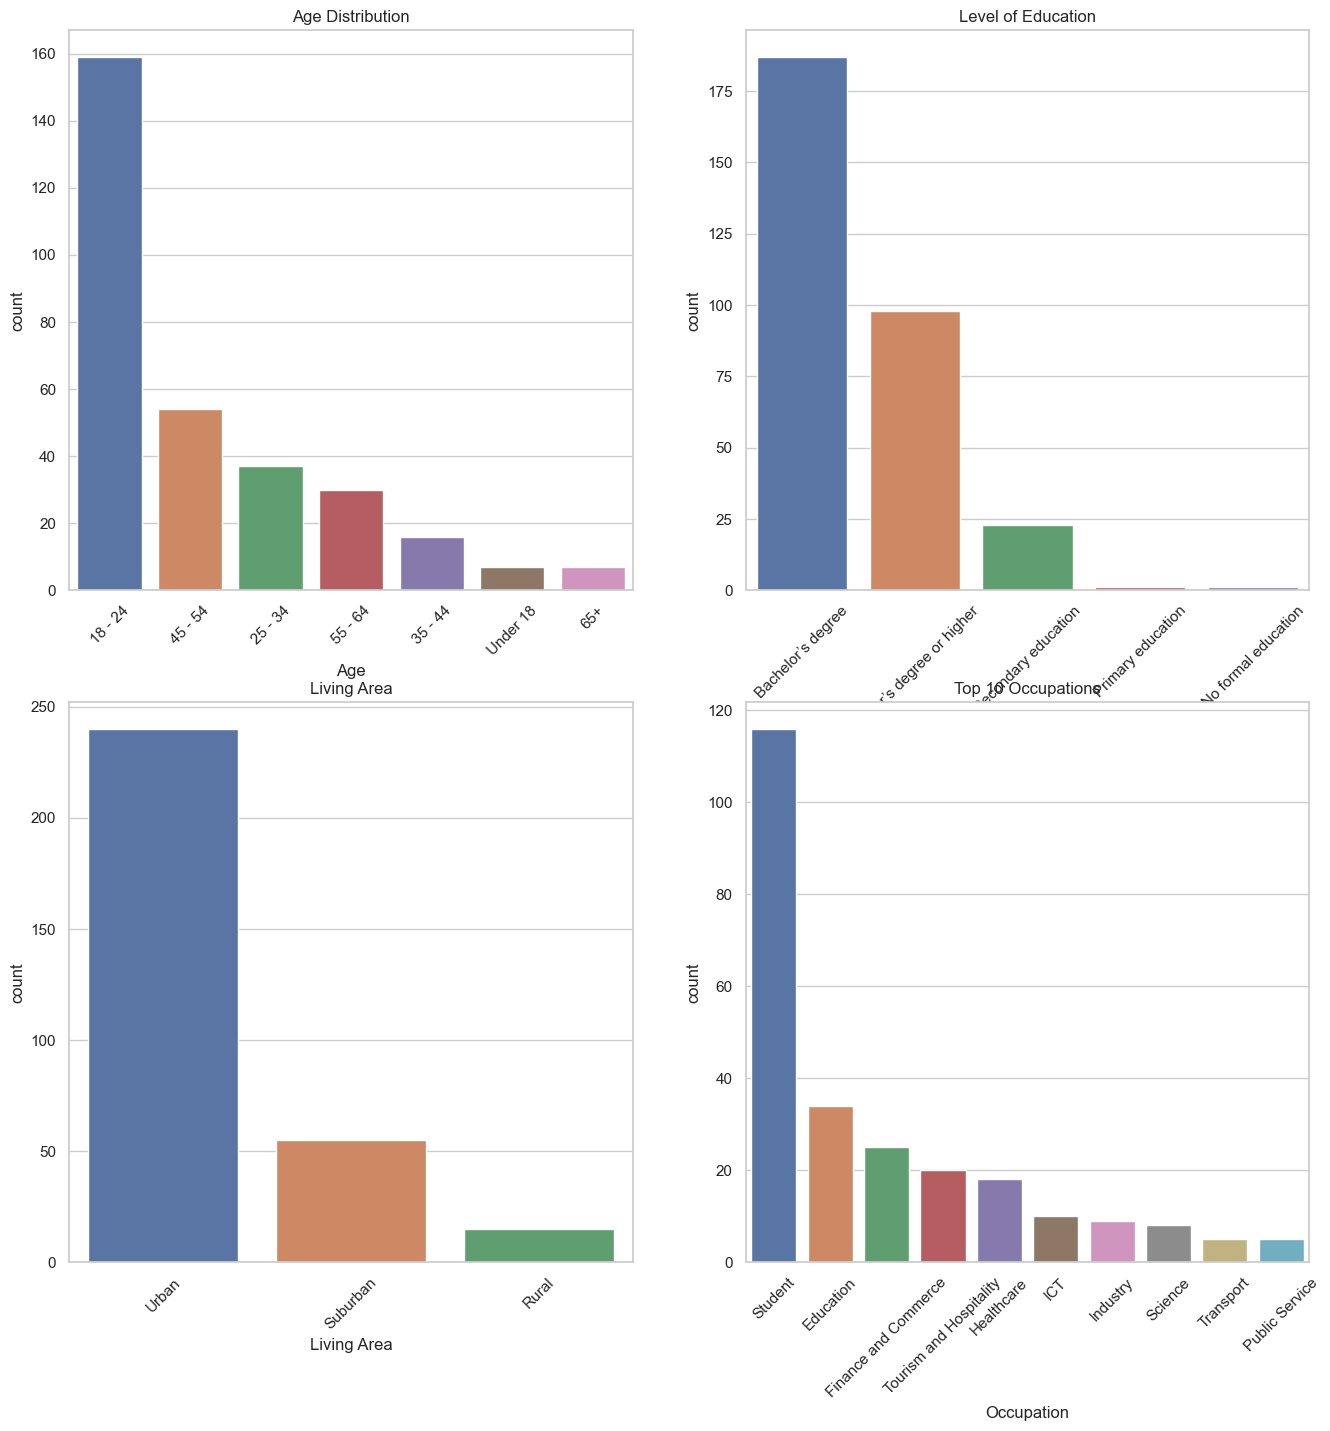

In [ ]:
#demographics

fig, axs = plt.subplots(2, 2, figsize=(16, 16))

#plot age distribution
sns.countplot(data=survey_df, x='Age', order=survey_df['Age'].value_counts().index, ax=axs[0, 0])
axs[0, 0].set_title("Age Distribution")
axs[0, 0].tick_params(axis='x', labelrotation=45)


# plot education distribution
sns.countplot(data=survey_df, x='Level of Education', order=survey_df['Level of Education'].value_counts().index, ax=axs[0, 1])
axs[0, 1].set_title("Level of Education")
axs[0, 1].tick_params(axis='x', labelrotation=45)

#plot living area 
sns.countplot(data=survey_df, x='Living Area', order=survey_df['Living Area'].value_counts().index, ax=axs[1, 0])
axs[1, 0].set_title("Living Area")
axs[1, 0].tick_params(axis='x', labelrotation=45)

#Plot occupation
top_occupations = survey_df['Occupation'].value_counts().nlargest(10).index
sns.countplot(data=survey_df[survey_df['Occupation'].isin(top_occupations)], x='Occupation', order=top_occupations, ax=axs[1, 1])
axs[1, 1].set_title("Top 10 Occupations")
axs[1, 1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.savefig("Graphs/Demographics.png", dpi=300)
plt.show()


In [ ]:
display(survey_df.head())

,Finished,Q_RecaptchaScore,Participate,Age,Country of Residence,Level of Education,Living Area,Occupation,General Awareness,Seriousness of City Water Quality,Awareness of city Management,Ppl with no Drinking Water 2023,Causes of Poor Water Quality,Agriculture,Global Warming,Industrial Waste,Marine Dumping of Garbage,Oil Leaks and Spills,Sewage and Wastewater,Attention given to Water on the News,Source of Awareness,Know of Urban Aquatic Ecosystem,Interest in Water Quality Management,Participated in Water Conservation Actitivites,Interest in Learning More,Interest in Learning more about City,What would you want to learn about,Likelihood in using digital platform,Features of Platform,Interested in Contributing to Platform,Interest in joining Community,Motivations to engage with environmental causes,Unanswered Percentage
0,True,0.9,Yes,18 - 24,Netherlands,Bachelor’s degree,Rural,Student,Somewhat knowledgeable,Somewhat serious,"Yes, I am partially aware (of the state of the...",2.2 billion,It can lead to waterborne disease such as chol...,1.0,3.0,4.0,6.0,2.0,5.0,Somewhat,"Social media,News websites,Word of mouth",Yes,61.0,Yes,Maybe,"Yes, definitely",NaN,6.0,"Educational information,Visualisations of up-t...",Maybe,Maybe,Local impact,0.076923
1,True,0.9,Yes,18 - 24,Italy,Master’s degree or higher,Suburban,Tourism and Hospitality,Neutral,Somewhat serious,"Yes, I am slightly aware.",2.2 billion,It can lead to waterborne disease such as chol...,2.0,3.0,1.0,5.0,6.0,4.0,Somewhat,"Social media,TV/radio",No,5.0,No,Maybe,Maybe,NaN,4.0,"Educational information,Forums for public disc...",Yes,Yes,"Health and Safety,Local impact",0.076923
2,True,1.0,Yes,18 - 24,Netherlands,Bachelor’s degree,Urban,Student,Neutral,Neutral/ Unsure,"Yes, I am partially aware (of the state of the...",1.5 billion,It can lead to waterborne disease such as chol...,2.0,6.0,5.0,4.0,3.0,1.0,Very little,"Social media,News websites,Word of mouth,Educa...",No,6.0,No,Maybe,Maybe,NaN,1.0,"Interactive maps,Educational information,Visua...",No,No,Global Climate Change,0.076923
3,True,1.0,Yes,18 - 24,Netherlands,Bachelor’s degree,Urban,Education,Not very knowledgeable,Somewhat serious,"Yes, I am slightly aware.",2.2 billion,It can lead to waterborne disease such as chol...,2.0,3.0,1.0,6.0,4.0,5.0,Somewhat,"Social media,News websites,Word of mouth,Educa...",No,6.0,No,Yes,"Yes, definitely",What impacts it has on nature and biodiversity...,10.0,Visualizations of up-to-date water quality dat...,Maybe,Maybe,"Concern for future generations,Health and Safe...",0.038462
4,True,0.9,Yes,18 - 24,Netherlands,Bachelor’s degree,Urban,Student,Somewhat knowledgeable,Somewhat serious,"Yes, I am partially aware (of the state of the...",3.6 billion,It can lead to waterborne disease such as chol...,1.0,2.0,4.0,5.0,6.0,3.0,Very little,"Word of mouth,Educational platforms",No,7.0,Yes,Yes,"Yes, definitely",NaN,6.0,"Interactive maps,Visualizations of up-to-date ...",Maybe,Maybe,"Health and Safety,Local impact",0.076923


RQ1: level of awareness

Mean General Awareness: 3.053956834532374


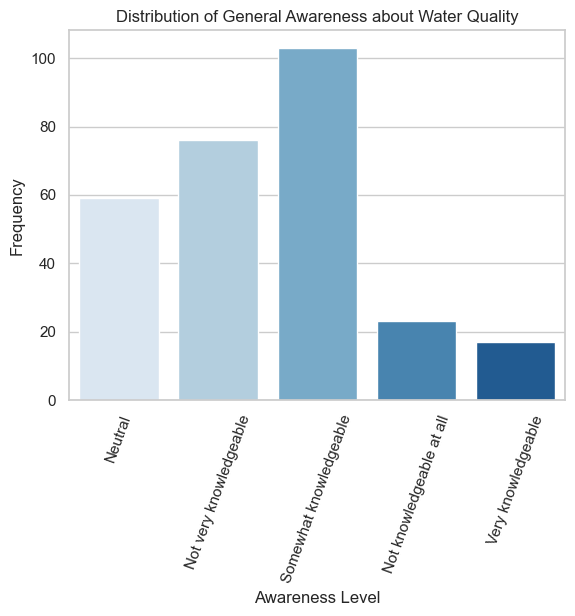

In [ ]:
# Map categorical values to numerical values for 'General Awareness' and apply to column
awareness_mapping = {'Very knowledgeable': 5, 'Somewhat knowledgeable': 4, 'Neutral': 3, 'Not very knowledgeable': 2, 'Not knowledgeable at all': 1}
survey_df['General Awareness Map'] = survey_df['General Awareness'].map(awareness_mapping)

# calculating the mean and visualizing the distribution of 'General Awareness'
mean_awareness = survey_df['General Awareness Map'].mean()
print(f"Mean General Awareness: {mean_awareness}")

#plot
sns.countplot(data=survey_df, x='General Awareness', palette='Blues')
plt.title("Distribution of General Awareness about Water Quality")
plt.xlabel("Awareness Level")
plt.xticks(rotation = 70)
plt.ylabel("Frequency")
plt.savefig("Graphs/General_Awareness.png", dpi=300)

plt.show()


factual questions - water quality awareness


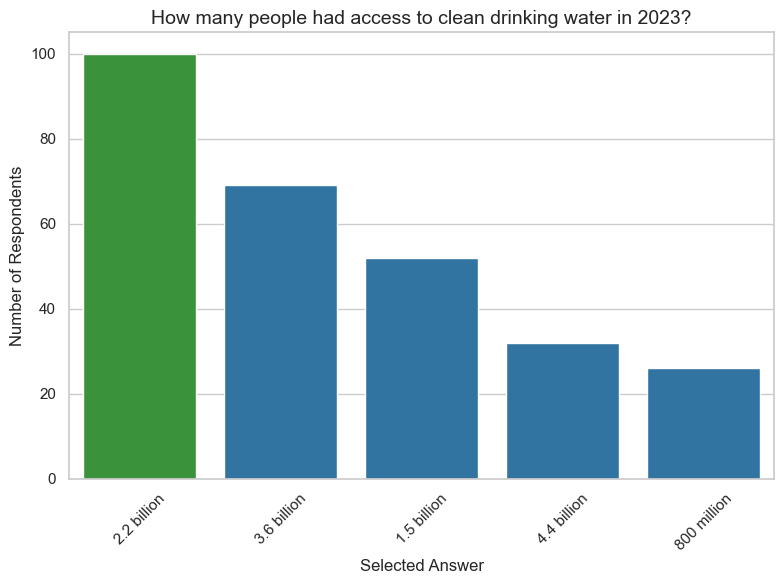

In [ ]:
# Factual Questions
plt.figure(figsize=(8, 6))
water_counts = survey_df['Ppl with no Drinking Water 2023'].value_counts().sort_values(ascending=False)

bar_colors = ['#1f77b4' if answer != '2.2 billion' else '#2ca02c' for answer in water_counts.index]
sns.barplot(x=water_counts.index, y=water_counts.values, palette = bar_colors)

plt.title("How many people had access to clean drinking water in 2023?", fontsize=14)
plt.xlabel("Selected Answer", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Graphs/Access_to_drinking_water.png", dpi=300)
plt.show()


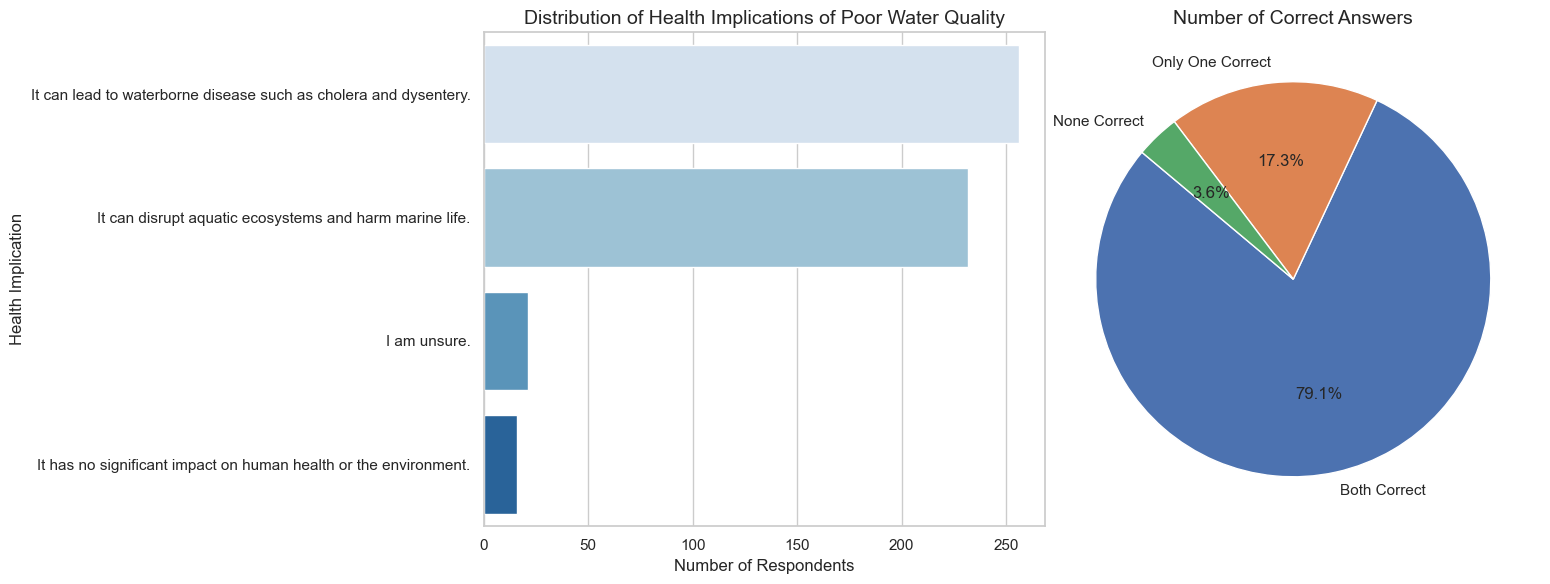

In [ ]:
# Question 2 - Water Quality can cause ...
causes_col = survey_df['Causes of Poor Water Quality'].dropna()

correct_1 = 'It can lead to waterborne disease such as cholera and dysentery.'
correct_2 = 'It can disrupt aquatic ecosystems and harm marine life.'

# Identifying categories
both = causes_col.str.contains(correct_1, case=False) & causes_col.str.contains(correct_2, case=False)
only_one = causes_col.str.contains(correct_1, case=False) ^ causes_col.str.contains(correct_2, case=False)
none = ~(causes_col.str.contains(correct_1, case=False) | causes_col.str.contains(correct_2, case=False))

# Count the categories
labels = ['Both Correct', 'Only One Correct', 'None Correct']
sizes = [both.sum(), only_one.sum(), none.sum()]

all_responses = ' '.join(survey_df['Causes of Poor Water Quality'].dropna())  # Combine all responses into one text string

possible_causes = [
    "It can lead to waterborne disease such as cholera and dysentery.",
    "It can disrupt aquatic ecosystems and harm marine life.",
    "It has no significant impact on human health or the environment.",
    "I am unsure."
]

cause_counts = Counter()
for cause in possible_causes:
    cause_counts[cause] = all_responses.count(cause)

cause_df = pd.DataFrame(list(cause_counts.items()), columns=['Cause', 'Count'])
cause_df = cause_df.sort_values(by='Count', ascending=False)

#plot it
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First chart: Bar Chart for response distribution
sns.barplot(x='Count', y='Cause', data=cause_df, palette='Blues', ax=axes[0])
axes[0].set_title("Distribution of Health Implications of Poor Water Quality", fontsize=14)
axes[0].set_xlabel("Number of Respondents")
axes[0].set_ylabel("Health Implication")

# Second chart: Pie Chart for correctness categories
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
axes[1].set_title("Number of Correct Answers", fontsize=14)

plt.tight_layout()
plt.savefig("Graphs/Poor_Water_quality_can_Cause.png", dpi=300)
plt.show()


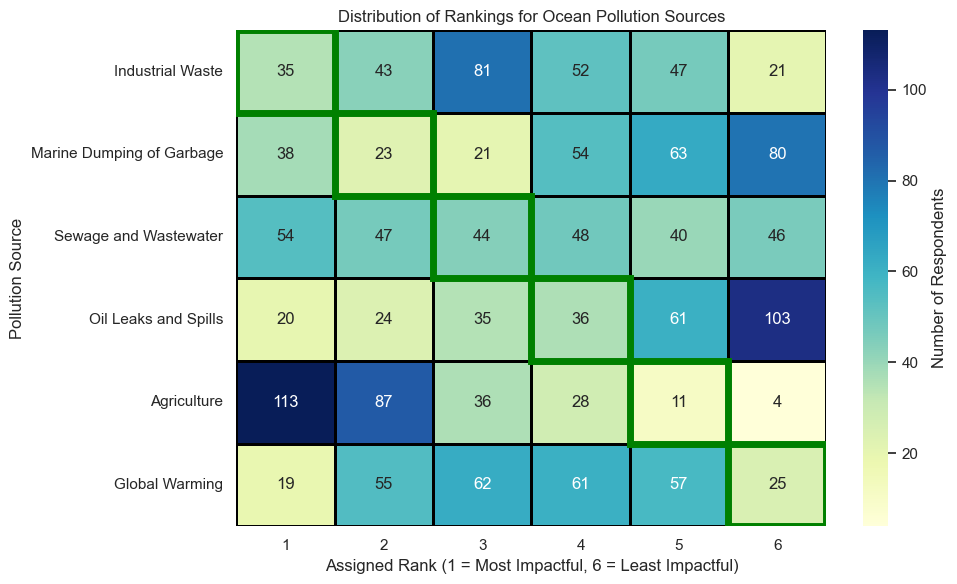

Number of respondents who got the order right: 0


In [ ]:
#Question 3: causes of poor marine quality
#columns and also the correct order of answers
ranking_cols = [ 'Industrial Waste', 'Marine Dumping of Garbage', 'Sewage and Wastewater', 'Oil Leaks and Spills', 'Agriculture', 'Global Warming']
correct_order = {1: 'Industrial Waste', 2: 'Marine Dumping of Garbage', 3: 'Sewage and Wastewater', 4: 'Oil Leaks and Spills',  5: 'Agriculture', 6: 'Global Warming'}
heatmap_data = pd.DataFrame(index=ranking_cols, columns=range(1, 7))

# Count how often each rank was given to each 
for col in ranking_cols:
    rank_counts = survey_df[col].value_counts()
    for rank in range(1, 7):
        heatmap_data.loc[col, rank] = rank_counts.get(rank, 0)

#plot it
heatmap_data = heatmap_data.astype(int)
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Respondents'},linewidths=1, linecolor='black')

# outline the correct oder
for rank, pollution in correct_order.items():
    ax.add_patch(plt.Rectangle((rank - 1, ranking_cols.index(pollution)), 1, 1,fill=False, edgecolor='green', lw=5))

plt.title("Distribution of Rankings for Ocean Pollution Sources")
plt.xlabel("Assigned Rank (1 = Most Impactful, 6 = Least Impactful)")
plt.ylabel("Pollution Source")
plt.tight_layout()
plt.savefig("Graphs/pollution_rank_heatmap.png", dpi=300)
plt.show()


# Check how many respondents got the correct order
correct_count = 0
partial_correct_count =  0
for _, row in survey_df.iterrows():
    # Create a list of the respondent's rankings based on the columns
    respondent_order = [row[col] for col in ranking_cols]
    
    # Compare the respondent's order to the correct order
    if respondent_order == [1.0,2.0,3.0,4.0,5.0,6.0]:
        correct_count += 1
     
print(f"Number of respondents who got the order right: {correct_count}")

RQ 2 - Interest 

Mean Interest in Water Quality Management: 6.303846153846154


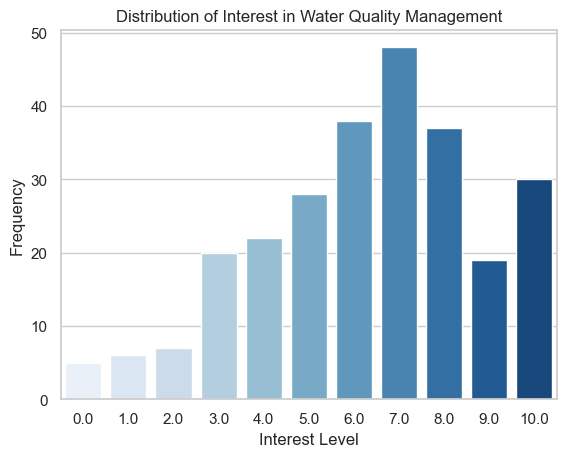

In [ ]:
# Convert the 'Interest in Water Quality Management' column to numeric values

survey_df = survey_df[survey_df['Interest in Water Quality Management'] != 61] # remove this random value 

survey_df['Interest in Water Quality Management'] = survey_df['Interest in Water Quality Management'].astype(float)

# Calculate the mean interest score
mean_interest = survey_df['Interest in Water Quality Management'].mean()
print(f"Mean Interest in Water Quality Management: {mean_interest}")

#plot it
sns.countplot(data=survey_df, x='Interest in Water Quality Management', palette='Blues')
plt.title("Distribution of Interest in Water Quality Management")
plt.xlabel("Interest Level")
plt.ylabel("Frequency")
plt.savefig("Graphs/Interest_Water.png", dpi=300)

plt.show()


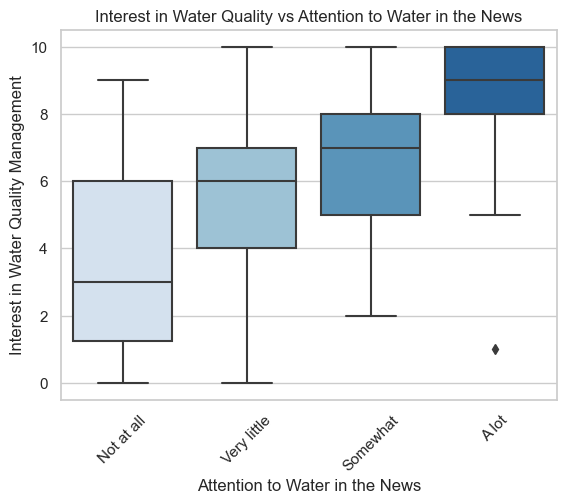

In [ ]:
# attention paid to water related news against interest in water quality
order = ['Not at all', 'Very little', 'Somewhat', 'A lot']
survey_df['Attention given to Water on the News'] = pd.Categorical(survey_df['Attention given to Water on the News'], categories=order, ordered=True)

sns.boxplot(data=survey_df, x='Attention given to Water on the News', y='Interest in Water Quality Management', palette='Blues')
plt.xticks(rotation=45)
plt.title("Interest in Water Quality vs Attention to Water in the News")
plt.xlabel("Attention to Water in the News")
plt.ylabel("Interest in Water Quality Management")
plt.savefig("Graphs/Water_Interest_and_News_Attention.png", dpi=300)

plt.show()


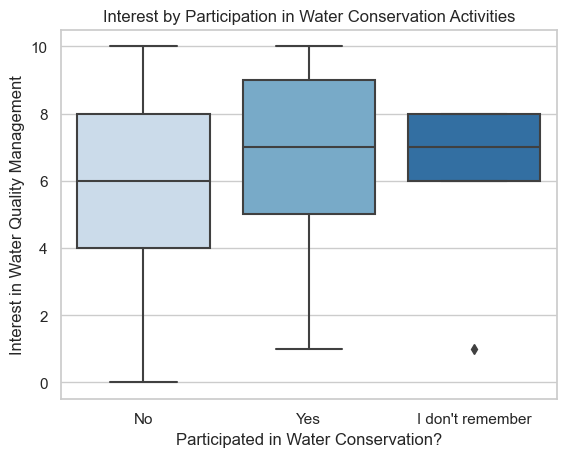

In [ ]:
# particiaption in water consevrtaion against interest in water quality
sns.boxplot(data=survey_df,x='Participated in Water Conservation Actitivites',y='Interest in Water Quality Management',palette='Blues')
plt.title("Interest by Participation in Water Conservation Activities")
plt.xlabel("Participated in Water Conservation?")
plt.ylabel("Interest in Water Quality Management")
plt.savefig("Graphs/Water_Interest_and_Conservation_Activities.png", dpi=300)

plt.show()


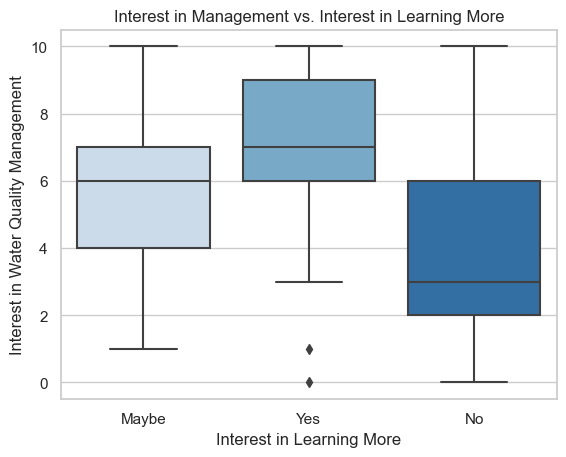

In [ ]:
# interest in learning more agasint interest in water
sns.boxplot(data=survey_df,x='Interest in Learning More',y='Interest in Water Quality Management',palette='Blues')
plt.title("Interest in Management vs. Interest in Learning More")
plt.xlabel("Interest in Learning More")
plt.ylabel("Interest in Water Quality Management")
plt.savefig("Graphs/Water_Interest_and_Learn_More.png", dpi=300)

plt.show()


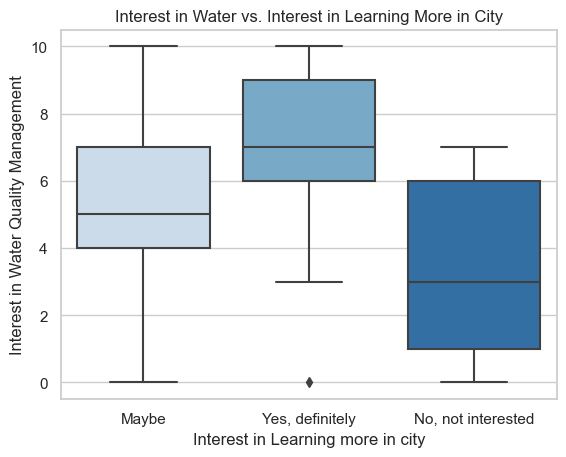

In [ ]:
sns.boxplot(data=survey_df,x='Interest in Learning more about City',y='Interest in Water Quality Management',palette='Blues')
plt.title("Interest in Water vs. Interest in Learning More in City")
plt.xlabel("Interest in Learning more in city")
plt.ylabel("Interest in Water Quality Management")
plt.savefig("Graphs/Water_Interest_and_Learn_City.png", dpi=300)
plt.show()


RQ3 / RQ4 , platform interests

In [ ]:
# Drop missing answers and strip extra whitespace
qual_responses = survey_df['What would you want to learn about'].dropna().str.strip()

# Show all unique repsonses
for i, response in enumerate(qual_responses.unique(), 1):
    print(f"{i}. {response}")


1. What impacts it has on nature and biodiversity, how much (micro)plastics are in drinking water, what the citisens can do do to help the water quality become better
2. How to improve it
3. Own habits that could be changed to better water quality
4. How to improve accessibility in low income areas, how government bodies conduct water management, how taxes fit into the process, how to better contribute to maintaining water quality to preserve ecology/marine wildlife/drinking supply
5. diseases and long term water availability
6. I dont really care but if there was a good awareness tool I would maybe
7. How my personal choices and habits impact the water quality and what can I change in my daily life to improve the water quality
8. Impacts on bad water quality
9. What you can do in the individual household or about waterfilters
10. I'd be interested in the extent to which the water quality in Dutch cities depends on what we do here vs 'what happens upstream' before. And, related, in col

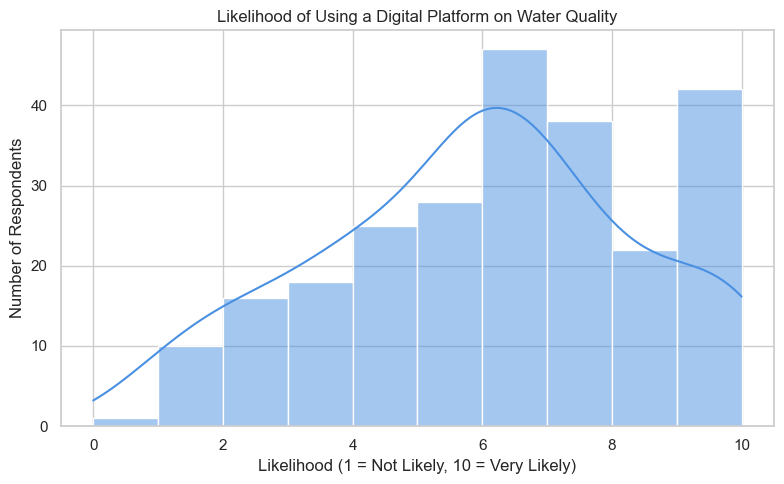

Average Likelihood of Using the Platform: 5.91


In [ ]:
# likelihood to use such a platform
# Convert likelihood to numeric
survey_df['Likelihood in using digital platform'] = pd.to_numeric(survey_df['Likelihood in using digital platform'], errors='coerce')

likelihood_data = survey_df['Likelihood in using digital platform'].dropna()

#plot
plt.figure(figsize=(8, 5))
sns.histplot(likelihood_data, bins=10, kde=True, color='#4a90e2')
plt.title("Likelihood of Using a Digital Platform on Water Quality")
plt.xlabel("Likelihood (1 = Not Likely, 10 = Very Likely)")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.savefig("Graphs/Likelihood_Use_Digital_Platform.png", dpi=300)
plt.show()

# Show mean likelihood
mean_likelihood = likelihood_data.mean()
print(f"Average Likelihood of Using the Platform: {mean_likelihood:.2f}")


In [ ]:
# Test if average likelihood is significantly greater than neutral value (5)
t_stat, p_value = ttest_1samp(likelihood_data, 5)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.9f}")

if p_value < 0.05 and mean_likelihood > 5:
    print("Reject H03 null: The public is statistically likely to use the platform.")
else:
    print("Fail to reject H03 null: Insufficient evidence for strong public interest.")


T-statistic: 5.833, P-value: 0.000000017
Reject H03 null: The public is statistically likely to use the platform.


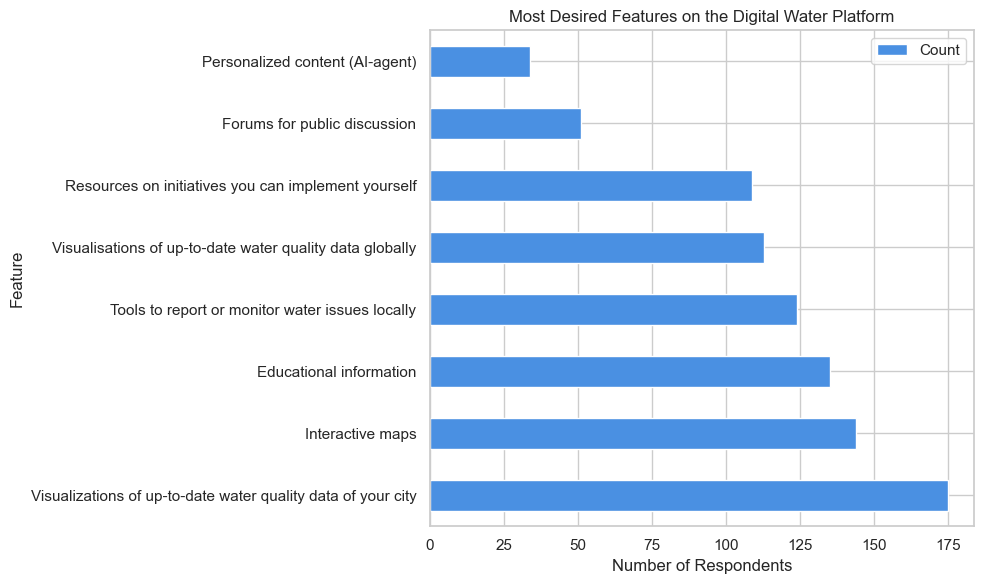

In [ ]:
# Features of Platform column: assuming it's a single string per row with options separated by commas
features_raw = survey_df['Features of Platform'].dropna()
from scipy.stats import ttest_1samp
from collections import Counter

all_features = []
for entry in features_raw:
    items = [i.strip() for i in str(entry).split(',')]
    all_features.extend(items)

# Count occurrences
feature_counts = Counter(all_features)

# plot
feature_df = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)
feature_df.plot(kind='barh', figsize=(10,6), color='#4a90e2')
plt.title("Most Desired Features on the Digital Water Platform")
plt.xlabel("Number of Respondents")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("Graphs/Desired_Platform_Features.png", dpi=300)
plt.show()


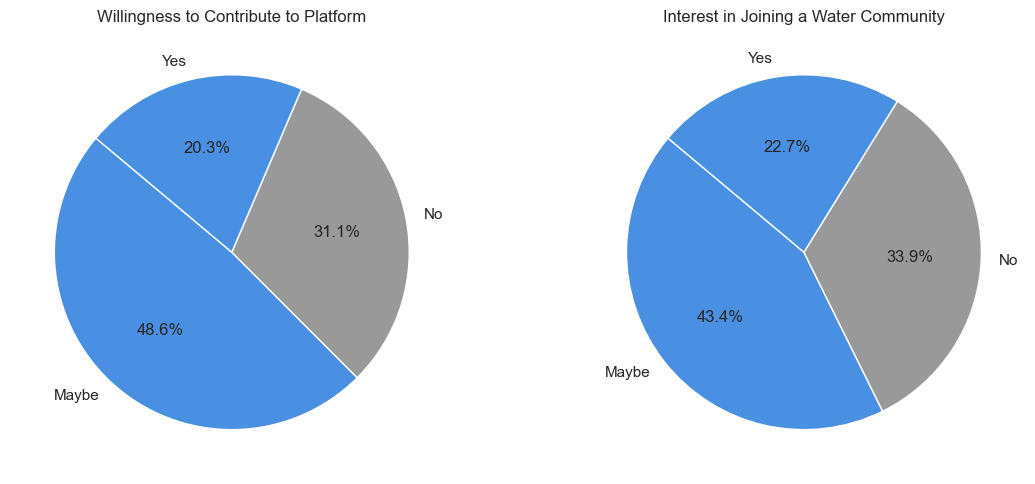

In [ ]:
# Participation Interest
contrib_counts = survey_df['Interested in Contributing to Platform'].value_counts()
community_counts = survey_df['Interest in joining Community'].value_counts()

#plot it
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].pie(contrib_counts, labels=contrib_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4a90e2', '#999999'])
axes[0].set_title("Willingness to Contribute to Platform")

axes[1].pie(community_counts, labels=community_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4a90e2', '#999999'])
axes[1].set_title("Interest in Joining a Water Community")

plt.tight_layout()
plt.savefig("Graphs/Platform_Interest_Piecharts.png", dpi=300)
plt.show()
